## CMPINF 2100 FINAL PROJECT - Addtional EDA and Transformation
### Travis Rogan
#### Pitt Athletics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

As the necesarry EDA was accomplished during my initial project proposal, the work done there has been resubmitted as my primary EDA submission for the final project. This notebook will cover the EDA regarding the transformed data in the dataframe once the missing values have been processed, and columns with a wide scope of continuous values have been binned

In [2]:
pitt_df = pd.read_csv('pitt_athletics_cmpinf2100_project.csv')
pitt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   accountid           3360 non-null   int64  
 1   age                 1567 non-null   float64
 2   gender              582 non-null    object 
 3   distancemiles       3360 non-null   float64
 4   direction           3360 non-null   object 
 5   peak_drivetime      2958 non-null   float64
 6   offpeak_drivetime   2996 non-null   float64
 7   season              3360 non-null   int64  
 8   purchase_month      3360 non-null   object 
 9   purchase_dow        3360 non-null   object 
 10  price_type          3360 non-null   object 
 11  price_level         3360 non-null   object 
 12  ticket_count        3360 non-null   int64  
 13  price_per_ticket    3360 non-null   float64
 14  return_next_season  3360 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 393.9+

In [3]:
# Percentage of missings in each column
pitt_df.isna().mean().round(3)


accountid             0.000
age                   0.534
gender                0.827
distancemiles         0.000
direction             0.000
peak_drivetime        0.120
offpeak_drivetime     0.108
season                0.000
purchase_month        0.000
purchase_dow          0.000
price_type            0.000
price_level           0.000
ticket_count          0.000
price_per_ticket      0.000
return_next_season    0.000
dtype: float64

The missings to be dealt with include the `age` and `gender` columns. The `_drivetime` columns will not be dealt with since they will be omitted from the model as explained in the project proposal.

## `Gender`

In [4]:
pitt_df.gender.value_counts(dropna=False)

gender
NaN                        2778
Male                        464
Female                      100
Prefer not to say            13
Prefer to self-describe       5
Name: count, dtype: int64

In [5]:
pitt_df_nm = pitt_df.copy()
#nm stands for "No Missings" in terms of the relevant data fields

In [6]:
pitt_df_nm.gender.fillna(value='(UNKNOWN)',inplace=True)
pitt_df_nm.gender.value_counts()

gender
(UNKNOWN)                  2778
Male                        464
Female                      100
Prefer not to say            13
Prefer to self-describe       5
Name: count, dtype: int64

Now that the gender column has had all it's missings replaced with "(UNKNOWN)", we can visualize the data surrounding the relationships it shares with other columns

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


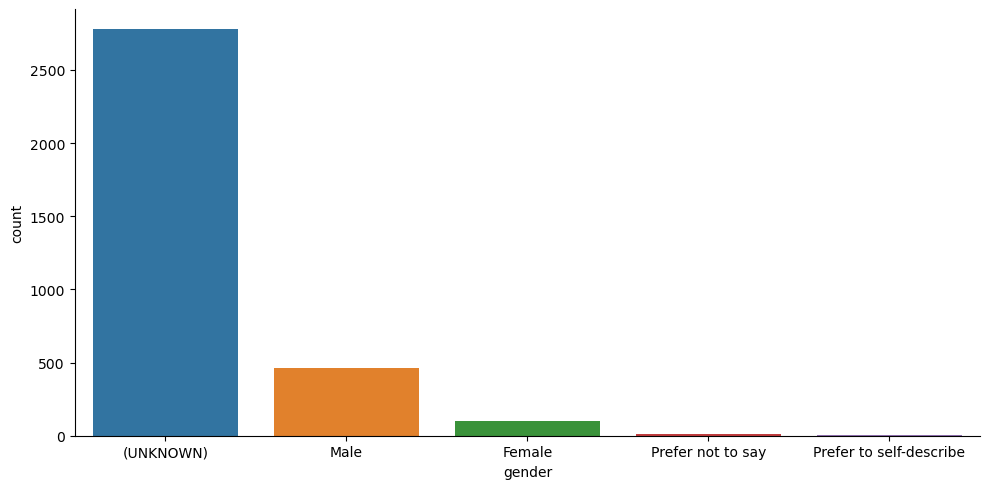

In [7]:
sns.catplot(data = pitt_df_nm, x = 'gender', kind = 'count', aspect = 2)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


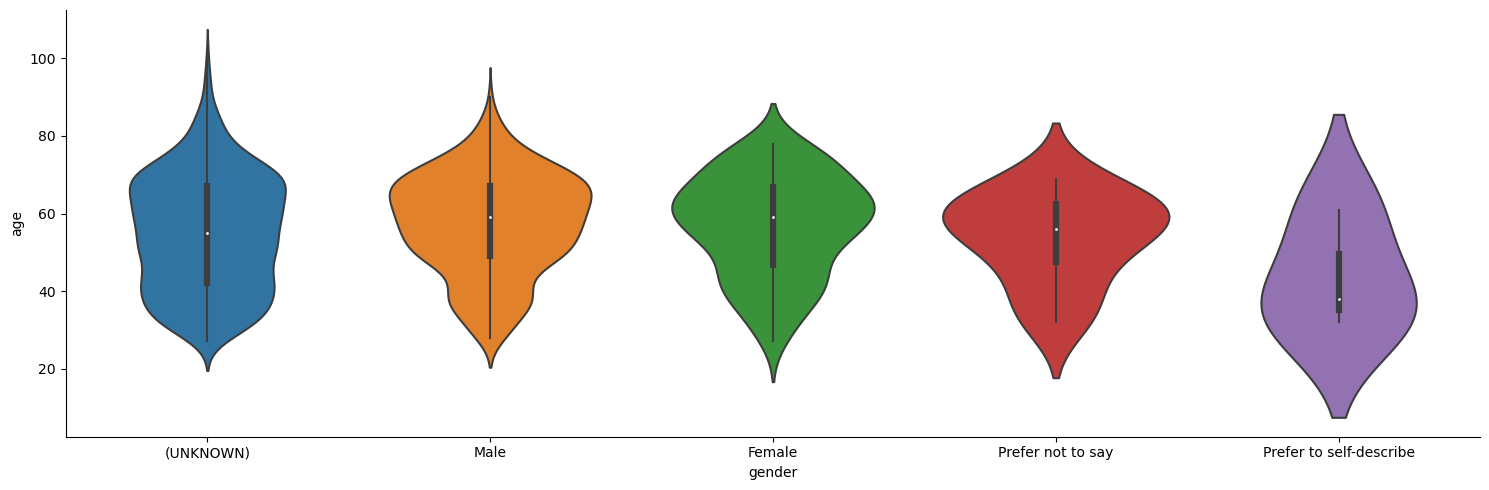

In [8]:
sns.catplot(data = pitt_df_nm, x = 'gender', y = 'age', kind = 'violin', aspect = 3 )

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


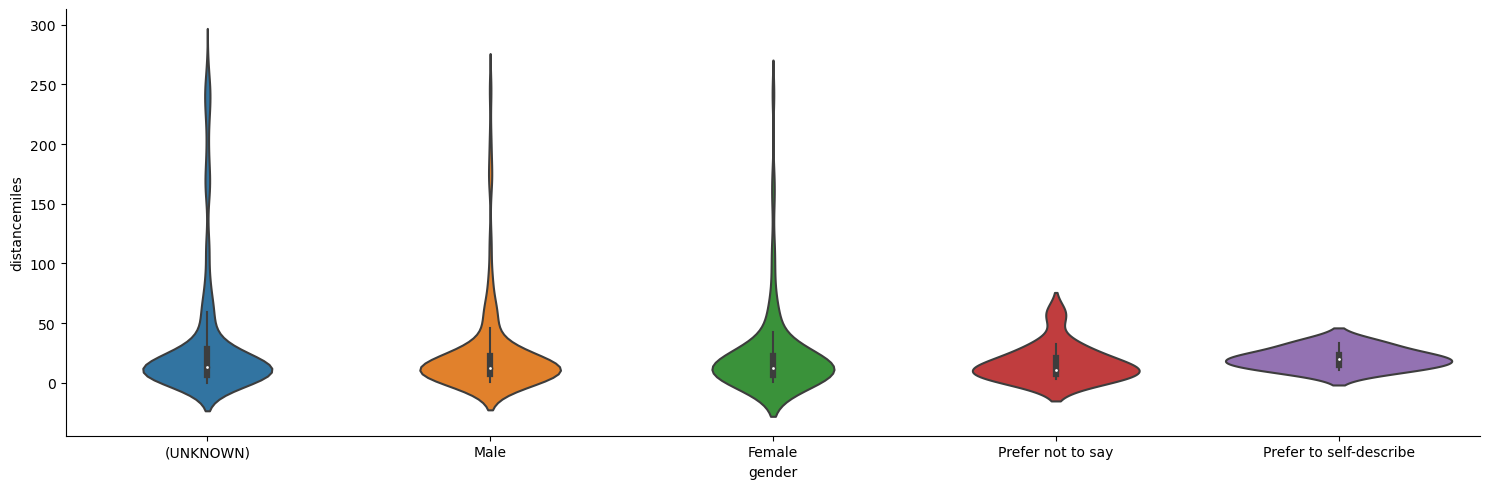

In [9]:
sns.catplot(data = pitt_df_nm, x = 'gender', y = 'distancemiles', kind = 'violin', aspect = 3 )

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


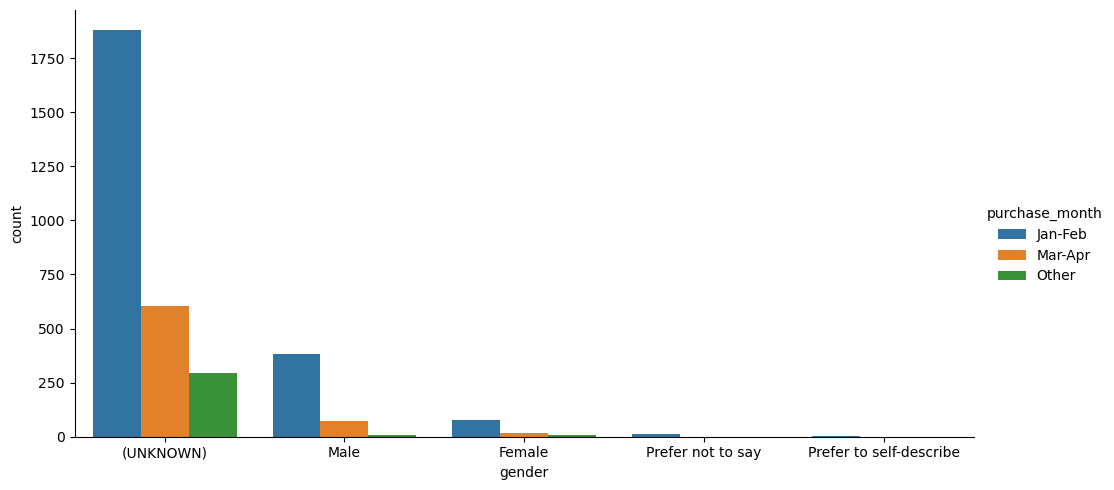

In [10]:
sns.catplot(data = pitt_df_nm, x = 'gender', hue = 'purchase_month', kind = 'count', aspect=2)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


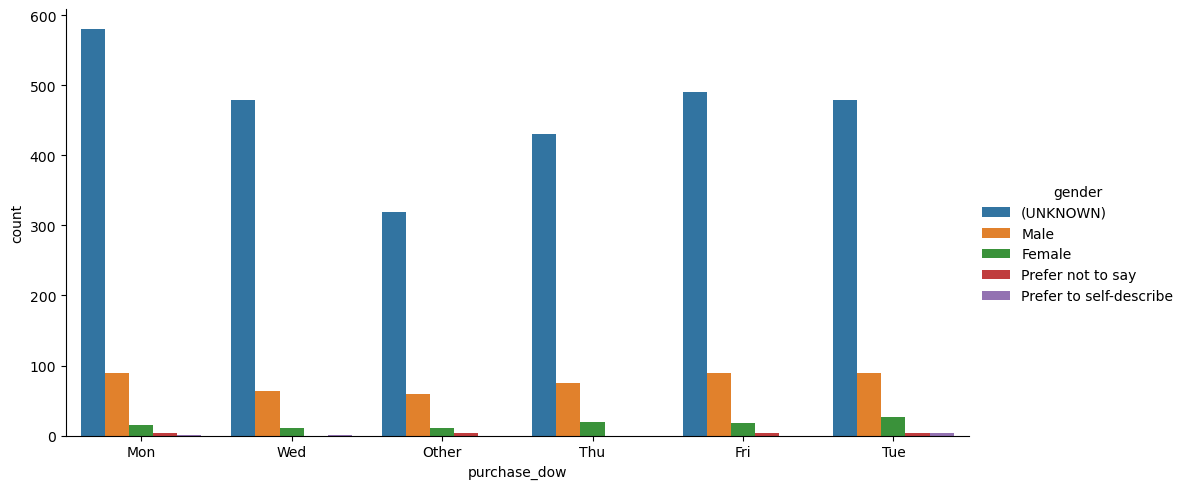

In [11]:
sns.catplot(data = pitt_df_nm, x = 'purchase_dow', hue = 'gender', kind = 'count', aspect=2)

plt.show()

Looking at just these view visualizations, we can see that the `(UNKNOWN)` gender category domiantes the others in terms of proportion. For this reason, we will group together all other categories and thus analyze whether knowing a customers gender can help us predict if they will return, rather than if their specific gender identification will affect the result.

In [12]:
pitt_df_nm['gender_known'] = np.where(pitt_df_nm.gender == '(UNKNOWN)', pitt_df_nm.gender, '(KNOWN)')

In [13]:
pitt_df_nm.gender_known.value_counts()

gender_known
(UNKNOWN)    2778
(KNOWN)       582
Name: count, dtype: int64

Now we can more easily compare our `gender_known` variable across others

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


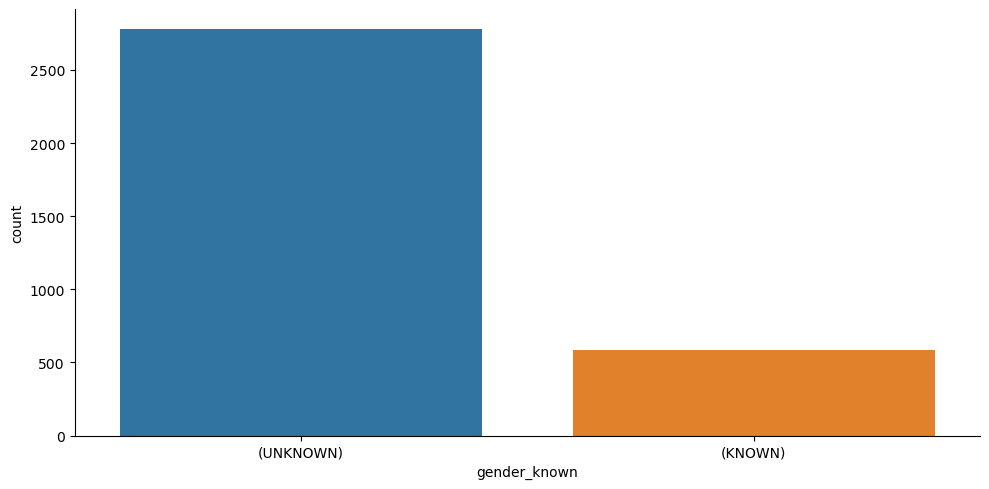

In [14]:
sns.catplot(data = pitt_df_nm, x = 'gender_known', kind = 'count', aspect = 2)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


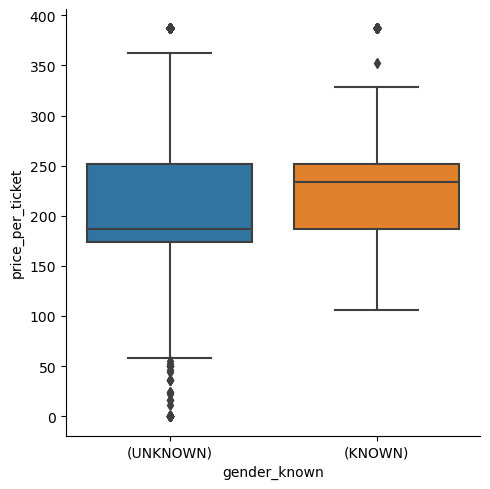

In [15]:
sns.catplot(data =pitt_df_nm, x = 'gender_known', y = 'price_per_ticket', kind = 'box')

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


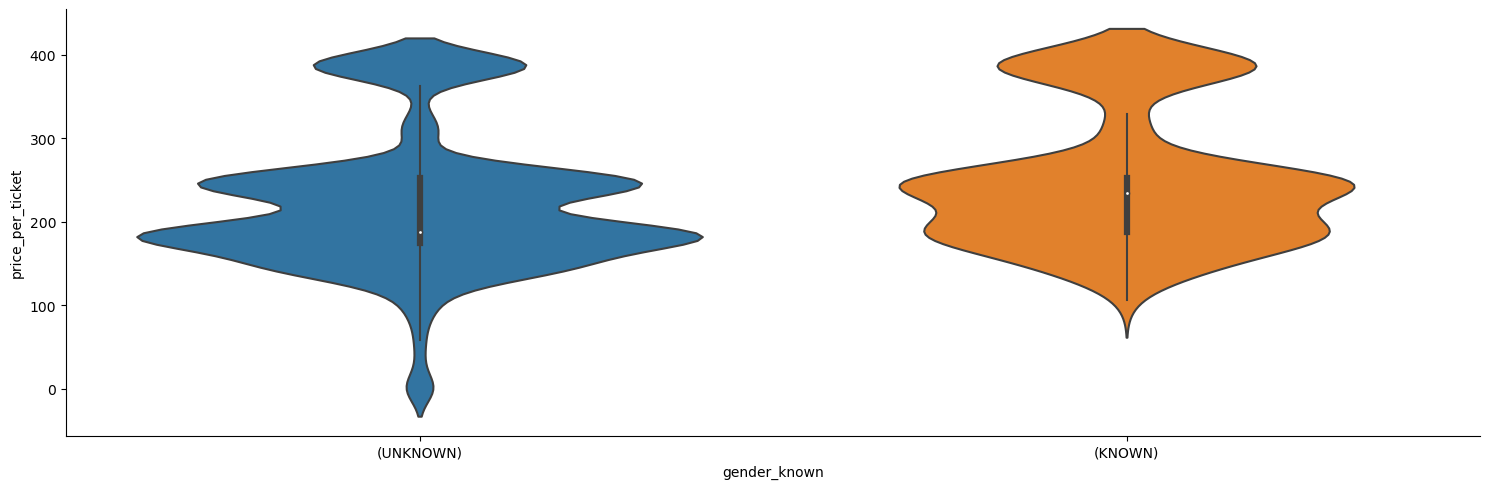

In [16]:
sns.catplot(data =pitt_df_nm, x = 'gender_known', y = 'price_per_ticket', kind = 'violin', aspect = 3)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


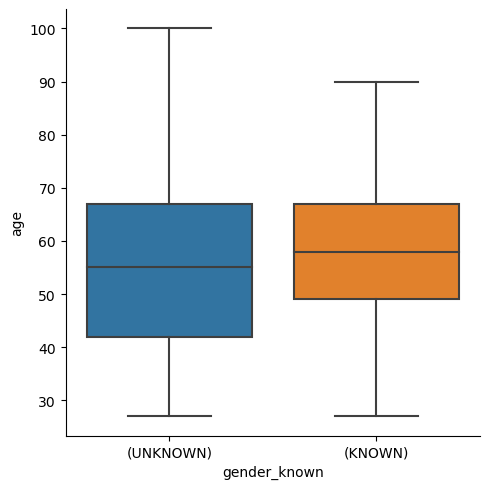

In [17]:
sns.catplot(data =pitt_df_nm, x = 'gender_known', y = 'age', kind = 'box')

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


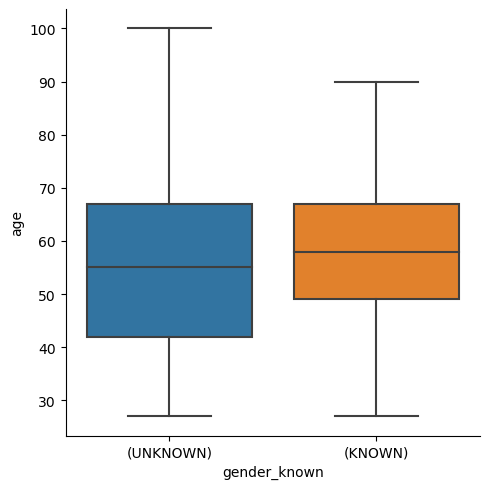

In [18]:
sns.catplot(data =pitt_df_nm, x = 'gender_known', y = 'age', kind = 'box')

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


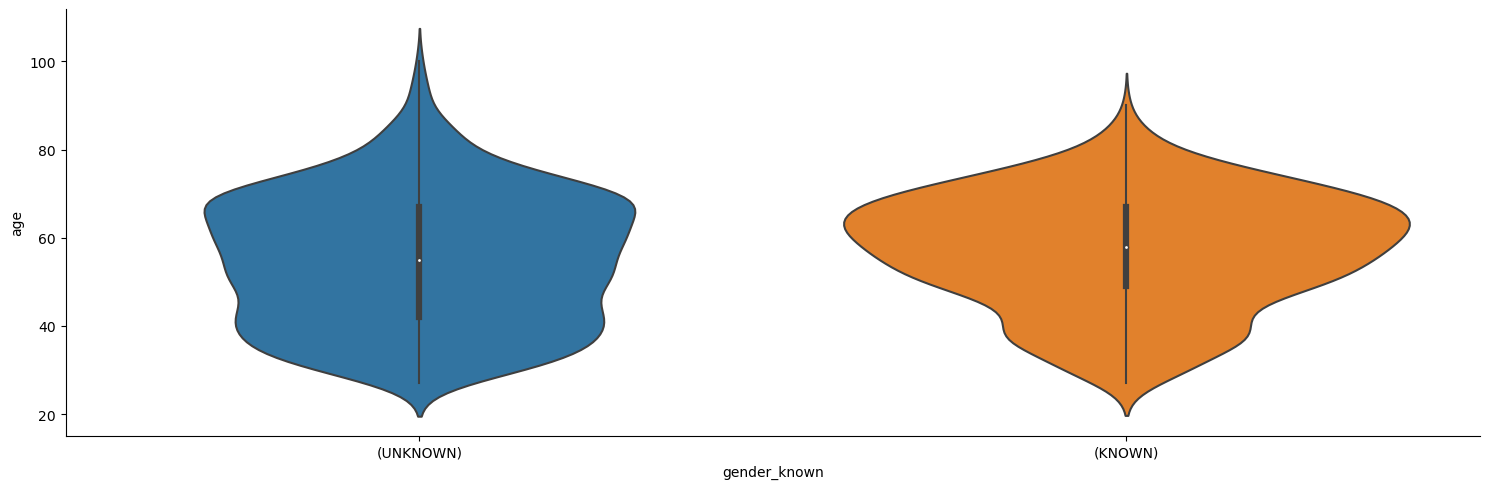

In [19]:
sns.catplot(data =pitt_df_nm, x = 'gender_known', y = 'age', kind = 'violin', aspect = 3)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


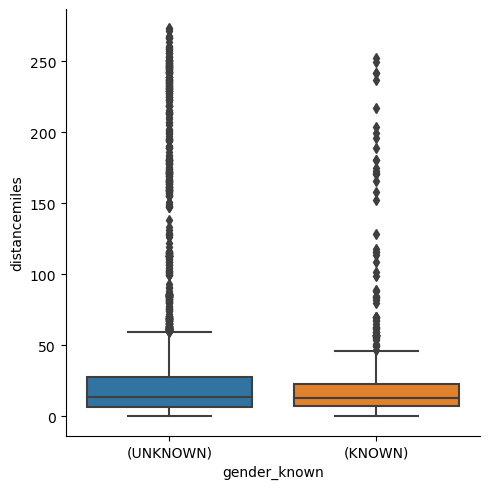

In [20]:
sns.catplot(data =pitt_df_nm, x = 'gender_known', y = 'distancemiles', kind = 'box')

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


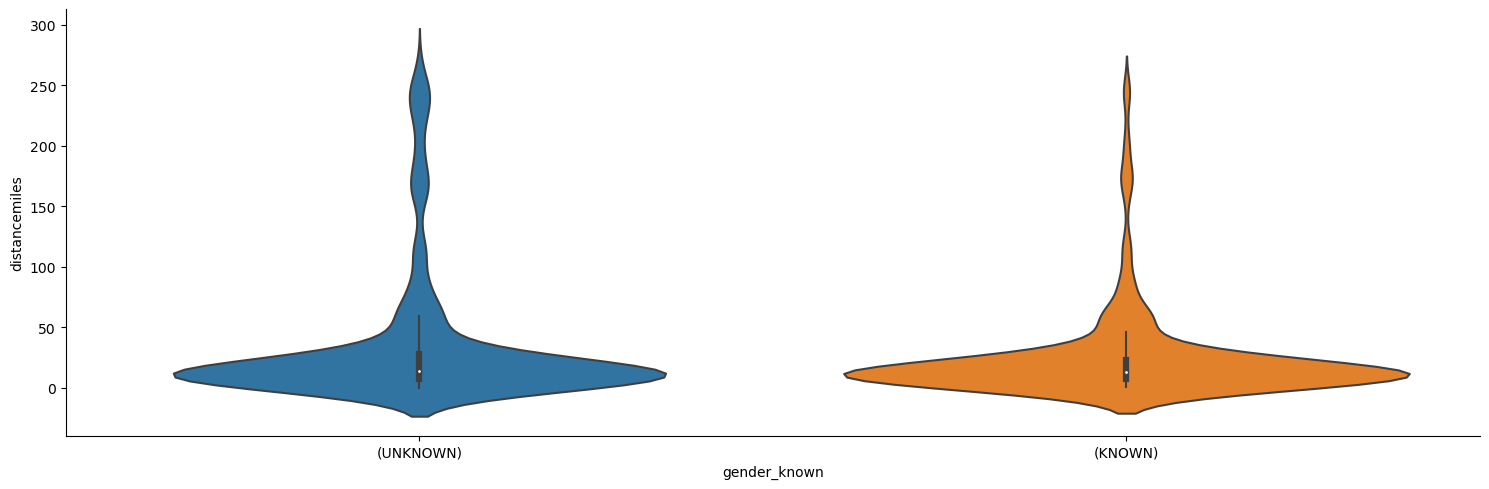

In [21]:
sns.catplot(data =pitt_df_nm, x = 'gender_known', y = 'distancemiles', kind = 'violin', aspect = 3)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


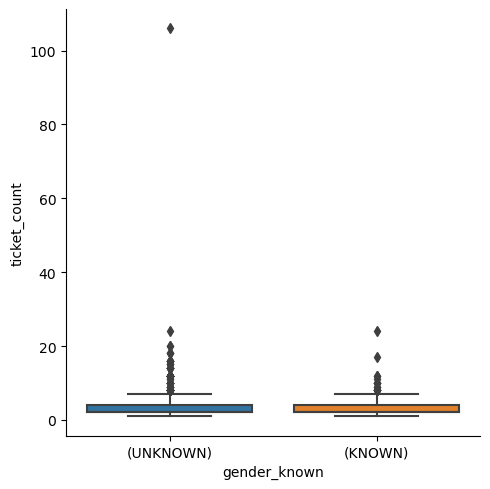

In [22]:
sns.catplot(data =pitt_df_nm, x = 'gender_known', y = 'ticket_count', kind = 'box')

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


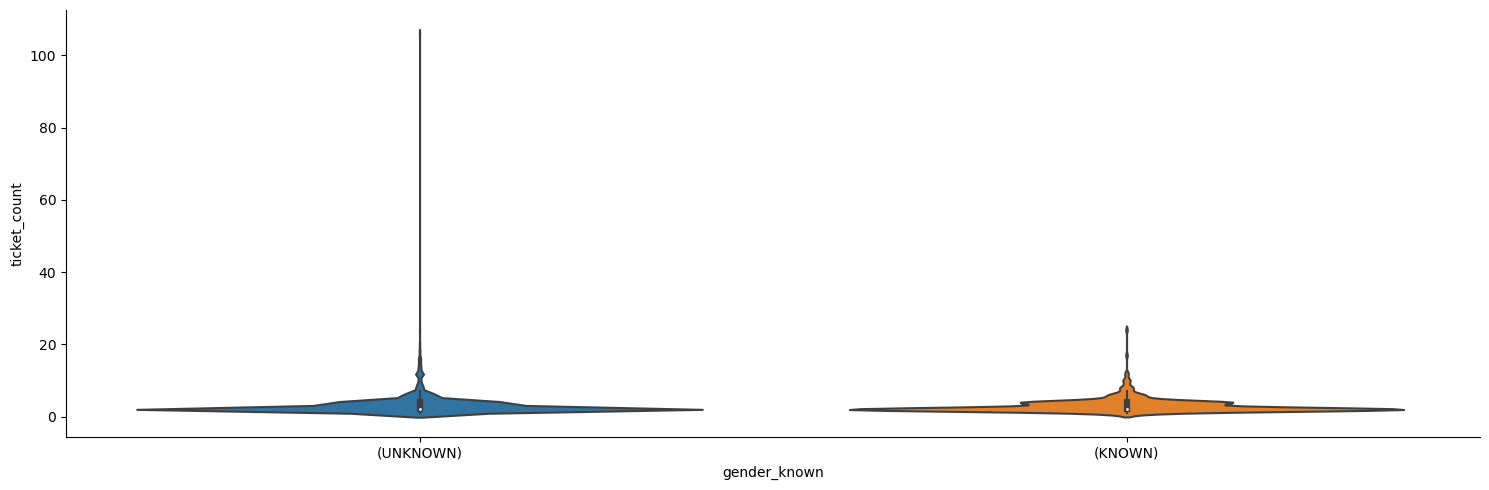

In [23]:
sns.catplot(data =pitt_df_nm, x = 'gender_known', y = 'ticket_count', kind = 'violin', aspect = 3)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


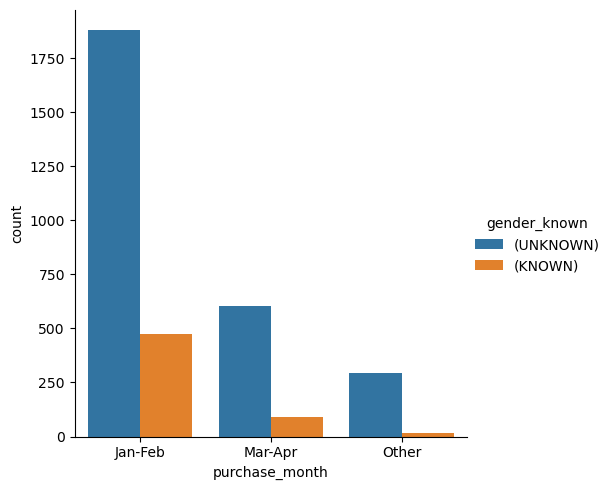

In [24]:
sns.catplot(data = pitt_df_nm, x = 'purchase_month', hue = 'gender_known', kind = 'count')

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


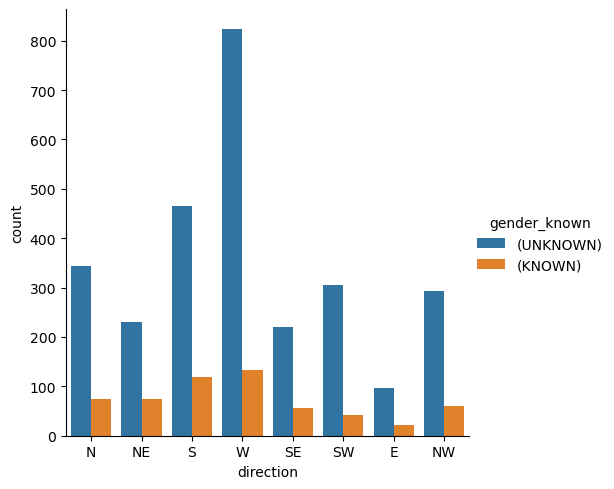

In [25]:
sns.catplot(data = pitt_df_nm, x = 'direction', hue = 'gender_known', kind = 'count')

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


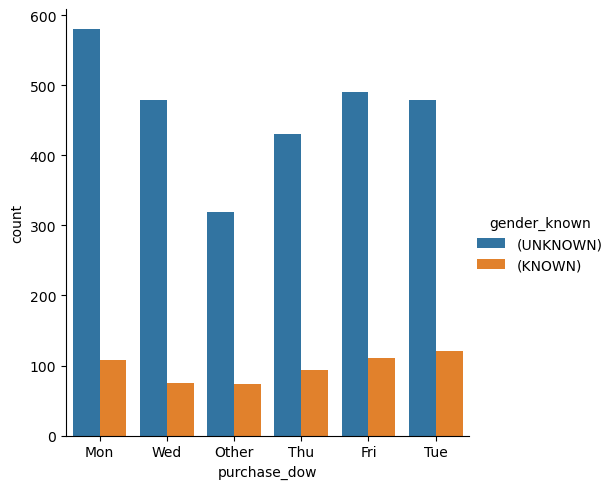

In [26]:
sns.catplot(data = pitt_df_nm, x = 'purchase_dow', hue = 'gender_known', kind = 'count')

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


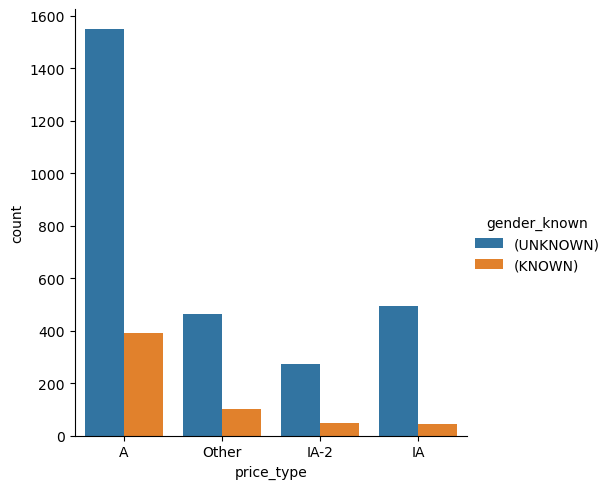

In [27]:
sns.catplot(data = pitt_df_nm, x = 'price_type', hue = 'gender_known', kind = 'count')

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


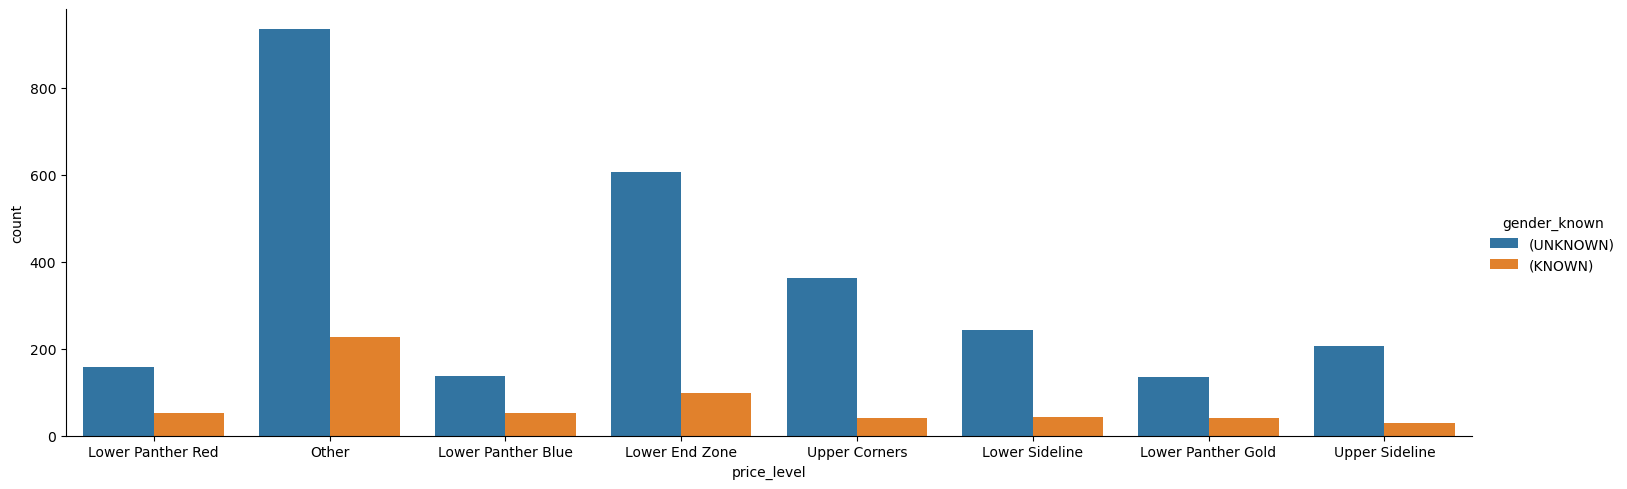

In [28]:
sns.catplot(data = pitt_df_nm, x = 'price_level', hue = 'gender_known', kind = 'count', aspect = 3)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


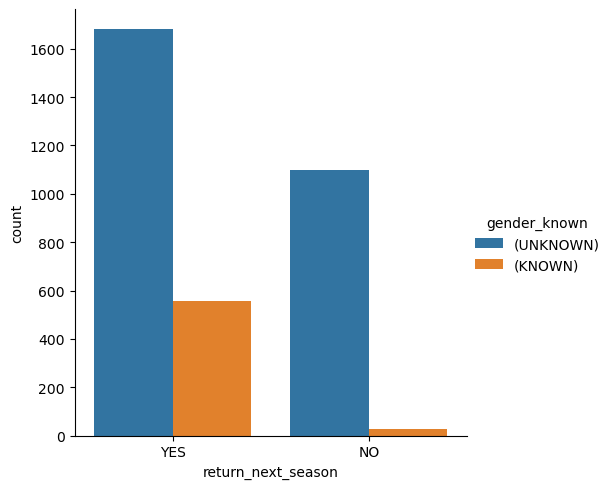

In [29]:
sns.catplot(data = pitt_df_nm, x = 'return_next_season', hue = 'gender_known', kind = 'count')

plt.show()

## `ticket_count`

Now that the `gender` column is prepared for the data model, we will explore the `ticket_count` variable

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


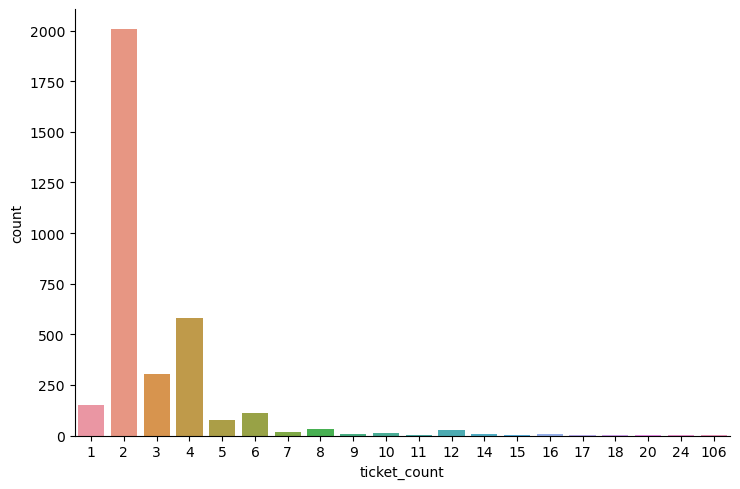

In [30]:
sns.catplot(data = pitt_df, x='ticket_count', kind='count', aspect=1.5)

plt.show()

There are 2 counts values (2 and 4) that dominate the results, and many other low frequency categories. We will bin the variables just as we did with `gender`, but this time into 5 bins

In [31]:
pitt_df_nm['lump_ticket_count'] = np.where( pitt_df.ticket_count > 4, '5 or more', pitt_df.ticket_count.astype('str') )


/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


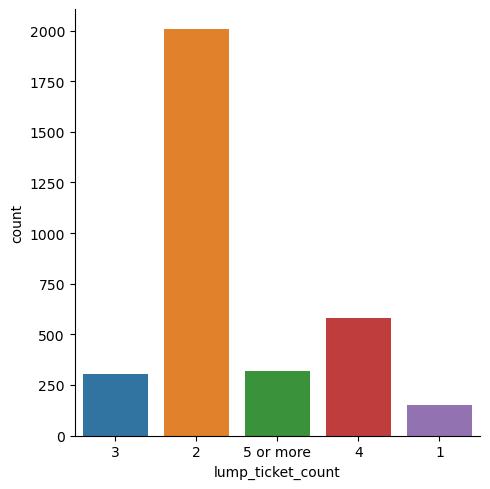

In [32]:
sns.catplot(data = pitt_df_nm, x='lump_ticket_count', kind='count')

plt.show()

In our data model, we will take into account not only the specifc number of tickets, but now also the categorical value of whether they purchased 1,2,3,4 or 5 or more tickets


## `age`

Age is the last category that will be used that still has missings, so we will bin age groups into 2 categorical variables of known ages, as well as classify the unknown ages as `(UKNOWN)`

In [33]:
pitt_df.age.describe()

count    1567.000000
mean       55.737077
std        14.307820
min        27.000000
25%        44.000000
50%        57.000000
75%        67.000000
max       100.000000
Name: age, dtype: float64

In [34]:
pitt_df_nm['bin_age'] = pd.cut( pitt_df.age, bins=2, include_lowest=True, ordered=False, labels=['A', 'B'])
pitt_df_nm.bin_age = pitt_df_nm.bin_age.astype('object')
pitt_df_nm.bin_age.value_counts(dropna=False)

bin_age
NaN    1793
A      1045
B       522
Name: count, dtype: int64

In [35]:
pitt_df_nm.bin_age.fillna(value='(UNKNOWN)', inplace=True)


In [36]:
pitt_df_nm.bin_age.isna().sum()

0

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


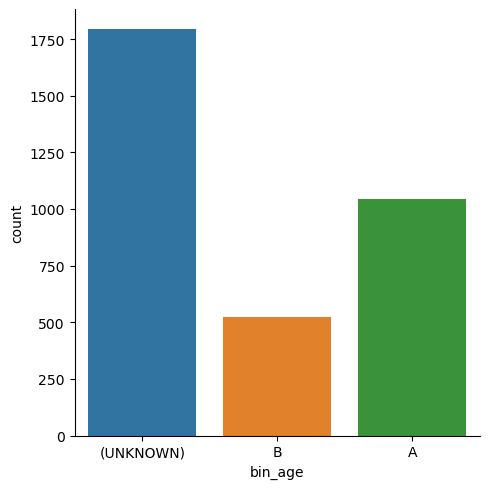

In [37]:
sns.catplot(data = pitt_df_nm, x='bin_age', kind='count')

plt.show()


## Preparing `return_next_season` for Modeling

In order to have our binary outcome ready for the logistic regression model, we will need to create a new variable called `y` that will == either `0` or `1` in the case of a non-event or event respectively

In [38]:
pitt_df_nm['y'] = np.where( pitt_df.return_next_season == 'YES', 1, 0 )

In [39]:
pitt_df_nm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   accountid           3360 non-null   int64  
 1   age                 1567 non-null   float64
 2   gender              3360 non-null   object 
 3   distancemiles       3360 non-null   float64
 4   direction           3360 non-null   object 
 5   peak_drivetime      2958 non-null   float64
 6   offpeak_drivetime   2996 non-null   float64
 7   season              3360 non-null   int64  
 8   purchase_month      3360 non-null   object 
 9   purchase_dow        3360 non-null   object 
 10  price_type          3360 non-null   object 
 11  price_level         3360 non-null   object 
 12  ticket_count        3360 non-null   int64  
 13  price_per_ticket    3360 non-null   float64
 14  return_next_season  3360 non-null   object 
 15  gender_known        3360 non-null   object 
 16  lump_t

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


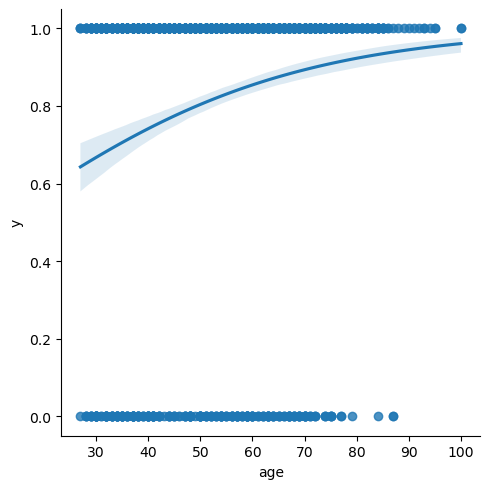

In [40]:
sns.lmplot(data = pitt_df_nm, x='age', y='y', logistic=True)

plt.show()


/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


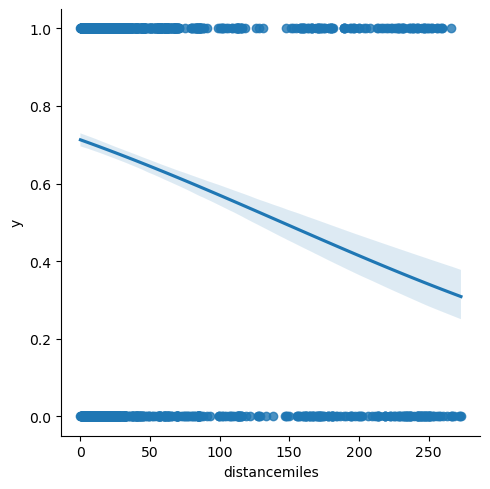

In [41]:
sns.lmplot(data = pitt_df_nm, x='distancemiles', y='y', logistic=True)

plt.show()


/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


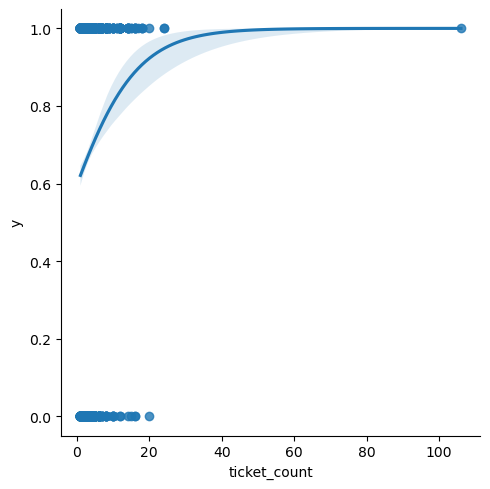

In [42]:
sns.lmplot(data = pitt_df_nm, x='ticket_count', y='y', logistic=True)

plt.show()


/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


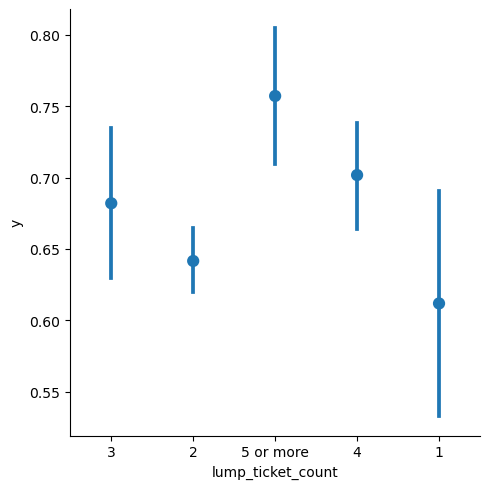

In [43]:
sns.catplot(data = pitt_df_nm, x='lump_ticket_count', y='y', kind='point', join = False)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


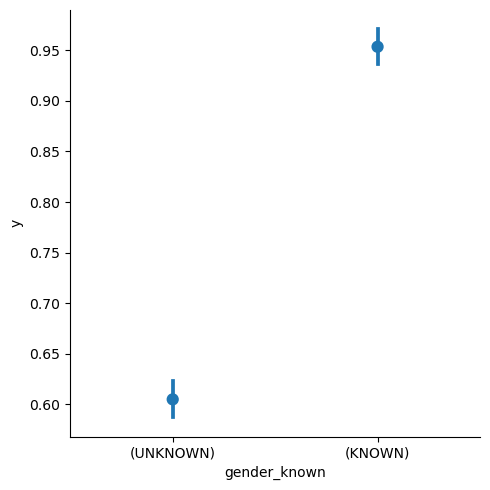

In [44]:
sns.catplot(data = pitt_df_nm, x='gender_known', y='y', kind='point', join = False)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


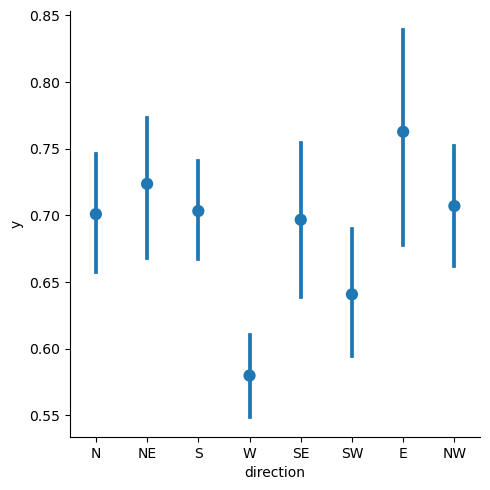

In [45]:
sns.catplot(data = pitt_df_nm, x='direction', y='y', kind='point', join = False)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


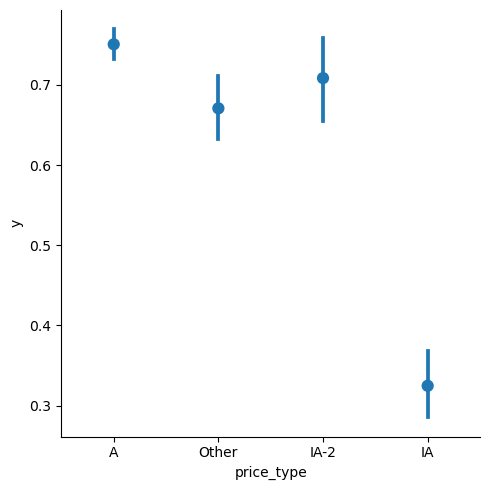

In [46]:
sns.catplot(data = pitt_df_nm, x='price_type', y='y', kind='point', join = False)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


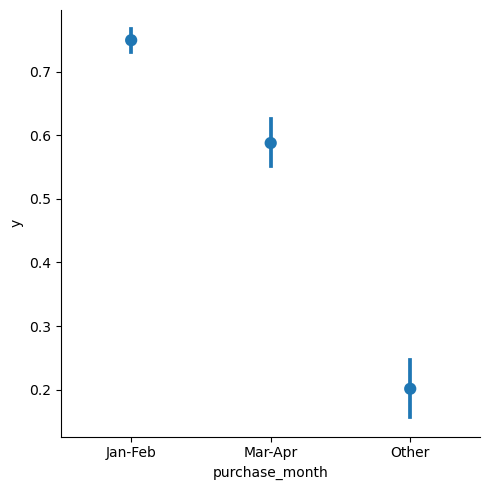

In [47]:
sns.catplot(data = pitt_df_nm, x='purchase_month', y='y', kind='point', join = False)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


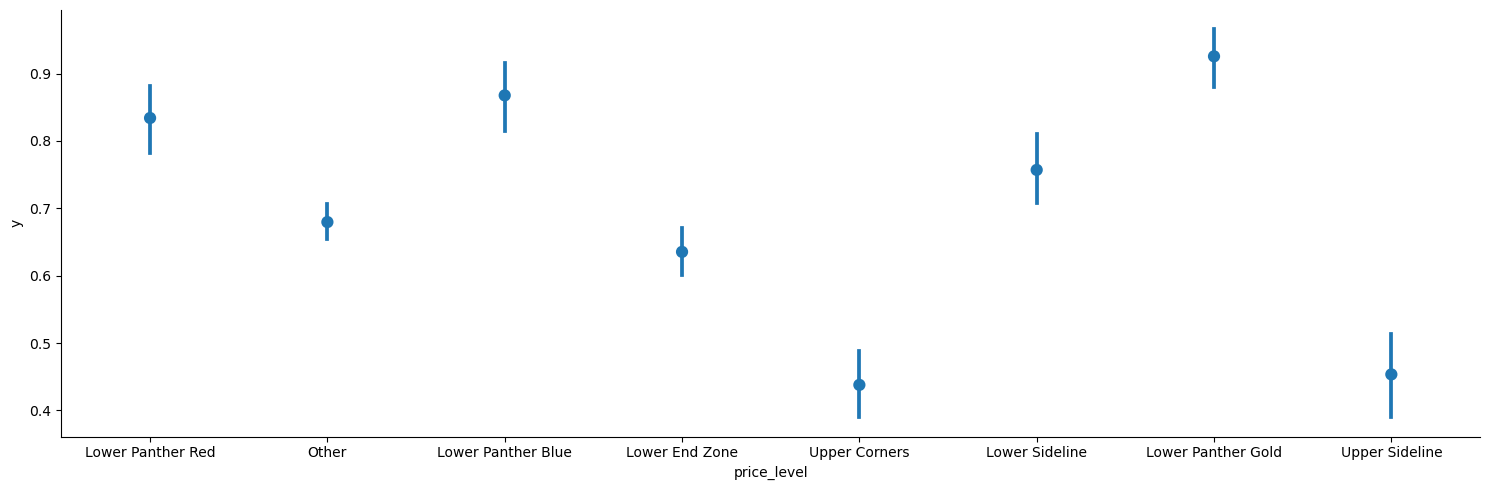

In [48]:
sns.catplot(data = pitt_df_nm, x='price_level', y='y', kind='point', join = False, aspect = 3)

plt.show()

/opt/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


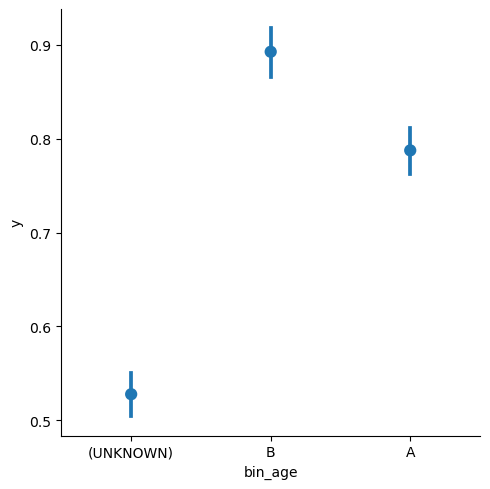

In [49]:
sns.catplot(data = pitt_df_nm, x='bin_age', y='y', kind='point', join = False)

plt.show()